In [7]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt

### 1.

In [2]:
signal = np.array([1, 0, 1, 0])

In [3]:
np.fft.fft(signal)

array([2.+0.j, 0.+0.j, 2.+0.j, 0.+0.j])

### 2.

In [6]:
import imageio
mt = imageio.imread("MaruTaro.jpg").mean(-1)

(1078, 1080)

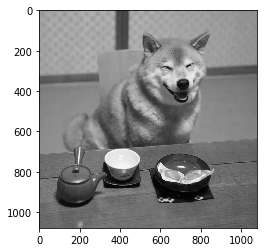

In [12]:
plt.imshow(mt, cmap="gray")
mt.shape

In [20]:
mt_dft = np.fft.fft2(mt)

In [21]:
print(mt_dft[0][0])
mt_dft.shape

(144354298.6666667+0j)


(1078, 1080)

In [22]:
mt.sum()

144354298.66666657

In [24]:
mt_dft[0][0][0]

IndexError: invalid index to scalar variable.

In [39]:
magn = (mt_dft.real ** 2 + mt_dft.imag ** 2) ** 0.5

In [40]:
phase = np.arctan(mt_dft.real, mt_dft.imag)
phase.shape

(1078, 1080)

In [41]:
phase == np.angle(mt_dft)

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

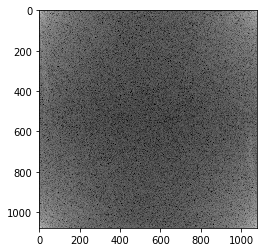

In [44]:
plt.imshow(np.abs(np.log(mt_dft)),cmap="gray")

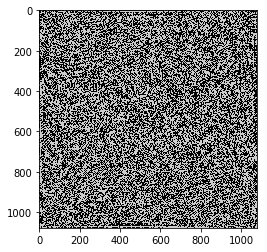

In [42]:
plt.imshow(np.angle(mt_dft), cmap="gray")

In [ ]:
shifted = np.fft.fftshift(mt_dft)

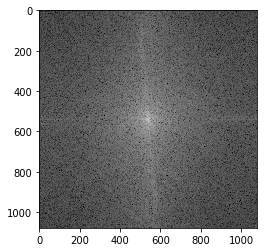

In [46]:
plt.imshow(np.abs(np.log(shifted)),cmap="gray")

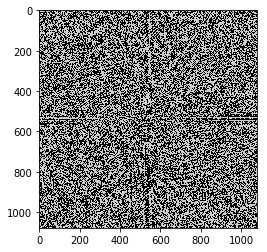

In [47]:
plt.imshow(np.angle(shifted), cmap="gray")

### 3.

In [50]:
ht = imageio.imread("halftone2.jpg").mean(-1)

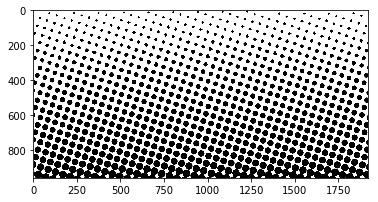

In [51]:
plt.imshow(ht, cmap="gray")

In [53]:
ht_shift = np.fft.fftshift(np.fft.fft2(ht))

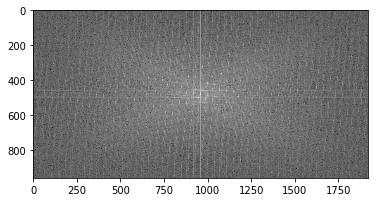

In [55]:
plt.imshow(np.log(np.abs(ht_shift)), cmap="gray")
#plt.savefig("ht_shift_magn.pdf")

## 2 Filtering in the frequency domain

In [68]:
shifted.shape

(1078, 1080)

In [71]:
x = np.arange(0, shifted.shape[0], 1)
y = np.arange(0, shifted.shape[1], 1)
U, V = np.meshgrid(x, y, indexing="ij")

In [78]:
# ideal_low_pass_filter = ilpf
ilpf = np.zeros(shifted.shape)
P = ilpf.shape[0]
Q = ilpf.shape[1]
ilpf[((U-P/2) ** 2 + (V-Q/2) ** 2) ** 0.5 <= 60] = 1

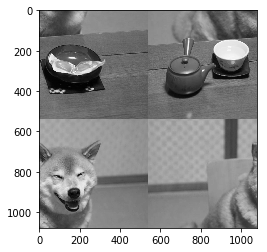

In [79]:
plt.imshow(np.fft.fftshift(mt), cmap="gray")

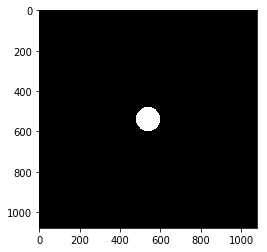

In [81]:
plt.imshow(ilpf, cmap="gray")

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


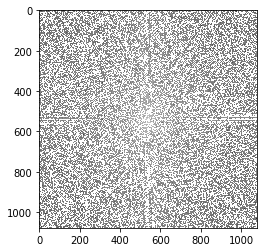

In [107]:
plt.imshow(np.log(shifted.real), cmap="gray")

In [123]:
shifted = np.fft.fftshift(np.fft.fft2(mt))

In [124]:
low_pass_shifted = shifted * ilpf

In [125]:
mt_ifft_filtered = np.fft.ifft2(np.fft.ifftshift(low_pass_shifted))

In [126]:
#mt_ifft_reshifted = np.fft.ifftshift(mt_ifft_filtered)

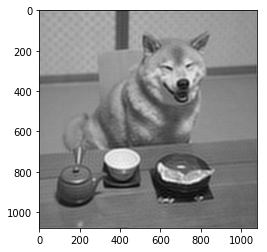

In [127]:
plt.imshow(np.real(mt_ifft_filtered), cmap="gray")

In [86]:
low_passed = mt_dft * ilpf

In [87]:
low_passed_filtered = np.fft.ifft2(low_passed)

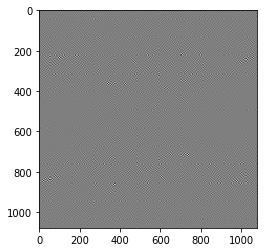

In [88]:
plt.imshow(low_passed_filtered.real, cmap="gray")